In [4]:
import os
import numpy as np
import pandas as pd
from sklearn import preprocessing

import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 50)
%matplotlib inline
plt.style.use('ggplot')

In [5]:
data = pd.read_csv('EPSFINAL.csv')
data = data.dropna()
print(data.shape)
print(list(data.columns))

(491, 41)
['Symbol', 'Name', 'Date Public', 'Founded', 'MarketValue', 'PQ1EarningsDate', 'PQ1Variance', '-10 Before Earnings', '+10 Since Earnings', '+20 Since Earnings', '+30 Since Earnings', 'P/Q-2 Earnings Date', 'P/Q-2Variance', '-10 Before Earnings.1', '+10 Since Earnings.1', '+20 Since Earnings.1', '+30 Since Earnings.1', 'P/Q-3 Earnings Date', 'P/Q-3Variance', '-10 Before Earnings.2', '+10 Since Earnings.2', '+20 Since Earnings.2', '+30 Since Earnings.2', 'P/Q-4 Earnings Date', 'P/Q-4 % Variance', '-10 Before Earnings.3', '+10 Since Earnings.3', '+20 Since Earnings.3', '+30 Since Earnings.3', 'P/Q-5 Earnings Date', 'P/Q-5 % Variance', '-10 Before Earnings.4', '+10 Since Earnings.4', '+20 Since Earnings.4', '+30 Since Earnings.4', 'P/Q-6 Earnings Date', 'P/Q-6 % Variance', '-10 Before Earnings.5', '+10 Since Earnings.5', '+20 Since Earnings.5', '+30 Since Earnings.5']


In [6]:
data.head(5)

,Symbol,Name,Date Public,Founded,MarketValue,PQ1EarningsDate,PQ1Variance,-10 Before Earnings,+10 Since Earnings,+20 Since Earnings,+30 Since Earnings,P/Q-2 Earnings Date,P/Q-2Variance,-10 Before Earnings.1,+10 Since Earnings.1,+20 Since Earnings.1,+30 Since Earnings.1,P/Q-3 Earnings Date,P/Q-3Variance,-10 Before Earnings.2,+10 Since Earnings.2,+20 Since Earnings.2,+30 Since Earnings.2,P/Q-4 Earnings Date,P/Q-4 % Variance,-10 Before Earnings.3,+10 Since Earnings.3,+20 Since Earnings.3,+30 Since Earnings.3,P/Q-5 Earnings Date,P/Q-5 % Variance,-10 Before Earnings.4,+10 Since Earnings.4,+20 Since Earnings.4,+30 Since Earnings.4,P/Q-6 Earnings Date,P/Q-6 % Variance,-10 Before Earnings.5,+10 Since Earnings.5,+20 Since Earnings.5,+30 Since Earnings.5
0,AAPL,Apple Inc.,11/05/1984,1976.0,"1,216,252",1/29/2020,10%,0.55%,-2.42%,-4.58%,7.36%,10/31/2019,7%,1.87%,3.53%,0.22%,2.00%,7/31/2019,4%,1.78%,-0.28%,-0.39%,4.25%,5/1/2019,4%,-0.67%,-7.00%,-4.49%,5.11%,1/3/2019,-10%,-1.64%,1.94%,4.14%,-0.36%,11/2/2018,5%,3.92%,-7.40%,-6.54%,-1.47%
1,MSFT,Microsoft Corporation,3/13/1986,1975.0,"1,208,069.0",1/30/2020,15%,3.90%,3.46%,0.29%,7.13%,10/24/2019,11%,-3.68%,0.49%,2.94%,0.04%,7/19/2019,13%,-0.77%,1.74%,0.73%,0.02%,4/25/2019,14%,3.09%,-0.98%,2.12%,2.18%,1/31/2019,1%,-1.47%,0.72%,3.07%,2.69%,10/25/2018,18%,1.05%,-0.67%,-1.62%,4.07%
2,AMZN,"Amazon.com, Inc.",5/15/1997,1994.0,"888,591.6",1/31/2020,60%,0.62%,1.35%,-0.03%,-8.65%,10/25/2019,-8%,1.09%,-1.04%,-2.90%,-0.72%,7/26/2019,-6%,-1.59%,-3.53%,-0.88%,-0.02%,4/26/2019,51%,1.67%,-1.30%,-1.68%,-0.14%,2/1/2019,7%,-1.35%,-3.83%,4.75%,1.66%,10/26/2018,86%,4.42%,-0.45%,-3.96%,5.17%
3,GOOGL,Alphabet Inc. Class A,8/19/2004,2015.0,"836,412.7",2/4/2020,23%,2.57%,2.68%,-1.86%,-12.11%,10/29/2019,-18%,3.36%,0.99%,-0.43%,2.27%,7/26/2019,28%,-0.94%,-1.08%,-0.65%,-0.21%,4/30/2019,-10%,4.73%,-2.57%,1.37%,-7.28%,2/5/2019,18%,1.02%,-4.66%,4.35%,3.76%,10/26/2018,25%,1.95%,-5.31%,1.74%,1.80%
4,FB,"Facebook, Inc. Class A",5/18/2012,2004.0,"485,374.8",1/30/2020,1%,2.16%,-1.14%,2.41%,-2.44%,10/31/2019,11%,-2.61%,-1.27%,2.86%,-4.69%,7/25/2019,-52%,0.00%,-3.13%,-3.84%,1.05%,4/25/2019,-47%,1.10%,-0.54%,-2.55%,-6.11%,1/31/2019,9%,-1.79%,-3.29%,-3.22%,1.96%,10/31/2018,20%,-3.41%,-4.83%,-5.24%,8.81%


In [7]:
data.columns.to_series().groupby(data.dtypes).groups

{dtype('float64'): Index(['Founded'], dtype='object'),
 dtype('O'): Index(['Symbol', 'Name', 'Date Public', 'MarketValue', 'PQ1EarningsDate',
        'PQ1Variance', '-10 Before Earnings', '+10 Since Earnings',
        '+20 Since Earnings', '+30 Since Earnings', 'P/Q-2 Earnings Date',
        'P/Q-2Variance', '-10 Before Earnings.1', '+10 Since Earnings.1',
        '+20 Since Earnings.1', '+30 Since Earnings.1', 'P/Q-3 Earnings Date',
        'P/Q-3Variance', '-10 Before Earnings.2', '+10 Since Earnings.2',
        '+20 Since Earnings.2', '+30 Since Earnings.2', 'P/Q-4 Earnings Date',
        'P/Q-4 % Variance', '-10 Before Earnings.3', '+10 Since Earnings.3',
        '+20 Since Earnings.3', '+30 Since Earnings.3', 'P/Q-5 Earnings Date',
        'P/Q-5 % Variance', '-10 Before Earnings.4', '+10 Since Earnings.4',
        '+20 Since Earnings.4', '+30 Since Earnings.4', 'P/Q-6 Earnings Date',
        'P/Q-6 % Variance', '-10 Before Earnings.5', '+10 Since Earnings.5',
        '+20 Since E

In [8]:
data.dtypes

Symbol                    object
Name                      object
Date Public               object
Founded                  float64
MarketValue               object
                          ...   
P/Q-6 % Variance          object
-10 Before Earnings.5     object
+10 Since Earnings.5      object
+20 Since Earnings.5      object
+30 Since Earnings.5      object
Length: 41, dtype: object

## Data Transformations: Date to Age

In [9]:
df = data[['Name','Date Public','MarketValue','PQ1Variance','+10 Since Earnings','+20 Since Earnings','+30 Since Earnings']]

In [10]:
import datetime

In [11]:
todaydate = datetime.datetime.today()

## Create New Column in DF 

In [12]:
df['Age'] = (todaydate - pd.to_datetime(df['Date Public'])).astype('<m8[Y]')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df.head(5)

,Name,Date Public,MarketValue,PQ1Variance,+10 Since Earnings,+20 Since Earnings,+30 Since Earnings,Age
0,Apple Inc.,11/05/1984,"1,216,252",10%,-2.42%,-4.58%,7.36%,35.0
1,Microsoft Corporation,3/13/1986,"1,208,069.0",15%,3.46%,0.29%,7.13%,34.0
2,"Amazon.com, Inc.",5/15/1997,"888,591.6",60%,1.35%,-0.03%,-8.65%,22.0
3,Alphabet Inc. Class A,8/19/2004,"836,412.7",23%,2.68%,-1.86%,-12.11%,15.0
4,"Facebook, Inc. Class A",5/18/2012,"485,374.8",1%,-1.14%,2.41%,-2.44%,7.0


In [14]:
df.dtypes

Name                   object
Date Public            object
MarketValue            object
PQ1Variance            object
+10 Since Earnings     object
+20 Since Earnings     object
+30 Since Earnings     object
Age                   float64
dtype: object

## Convert Objects to Floats & Integers 

In [15]:
def convertMarketValue(valueInString):
    return float(valueInString.replace(",",""))

In [16]:
df['MarketValue'] = df['MarketValue'].apply(convertMarketValue)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df['PQ1Variance'] = df['PQ1Variance'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)/100

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df['PQ1Variance'].describe()

count    491.000000
mean      -0.467271
std       12.649785
min     -279.810000
25%        0.000000
50%        0.030000
75%        0.090000
max       10.040000
Name: PQ1Variance, dtype: float64

In [19]:
df['+10 Since Earnings'] = df['+10 Since Earnings'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)/100

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df['+20 Since Earnings'] = df['+20 Since Earnings'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)/100

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df['+30 Since Earnings'] = df['+30 Since Earnings'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)/100

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
criteria = [df['Age']<=10, df['Age'].between(10,20,inclusive=False), df['Age']>=20]
values = [1,2,3]
df['AGECAT'] = np.select(criteria,values)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
criteria = [df['MarketValue']<=10222,df['MarketValue'].between(10222,43868,inclusive=False),df['MarketValue']>=43868.07]
values = [1,2,3]
df['MRKTVCAT'] = np.select(criteria,values)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
criteria = [df['PQ1Variance']<= -0.467271,df['PQ1Variance'].between( -0.467271,0,inclusive=False),df['PQ1Variance'].between(0,0.03,inclusive=False),df['PQ1Variance']>=.03]
values = [-1,0,1,2]
df['ExceedForecast'] = np.select(criteria,values)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
criteria = [df['+10 Since Earnings']<=0, df['+10 Since Earnings']>=0]
values = [0,1]
df['y'] = np.select(criteria,values)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
criteria = [df['+20 Since Earnings']<=0, df['+20 Since Earnings']>=0]
values = [0,1]
df['+20Gain/Loss'] = np.select(criteria,values)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
criteria = [df['+30 Since Earnings']<=0, df['+30 Since Earnings']>=0]
values = [0,1]
df['+30Gain/Loss'] = np.select(criteria,values)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
df.head(5)

,Name,Date Public,MarketValue,PQ1Variance,+10 Since Earnings,+20 Since Earnings,+30 Since Earnings,Age,AGECAT,MRKTVCAT,ExceedForecast,y,+20Gain/Loss,+30Gain/Loss
0,Apple Inc.,11/05/1984,1216252.0,0.10,-0.0242,-0.0458,0.0736,35.0,3,3,2,0,0,1
1,Microsoft Corporation,3/13/1986,1208069.0,0.15,0.0346,0.0029,0.0713,34.0,3,3,2,1,1,1
2,"Amazon.com, Inc.",5/15/1997,888591.6,0.60,0.0135,-0.0003,-0.0865,22.0,3,3,2,1,0,0
3,Alphabet Inc. Class A,8/19/2004,836412.7,0.23,0.0268,-0.0186,-0.1211,15.0,2,3,2,1,0,0
4,"Facebook, Inc. Class A",5/18/2012,485374.8,0.01,-0.0114,0.0241,-0.0244,7.0,1,3,1,0,1,0


## Ensure Data Types APPROPRIATE

In [29]:
df.dtypes

Name                   object
Date Public            object
MarketValue           float64
PQ1Variance           float64
+10 Since Earnings    float64
+20 Since Earnings    float64
+30 Since Earnings    float64
Age                   float64
AGECAT                  int64
MRKTVCAT                int64
ExceedForecast          int64
y                       int64
+20Gain/Loss            int64
+30Gain/Loss            int64
dtype: object

In [30]:
df['y'].value_counts()

0    307
1    184
Name: y, dtype: int64

In [31]:
count_no_sub = len(df[df['y']==0])
count_sub = len(df[df['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of Companies that Lost SV", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of companies that gained SV", pct_of_sub*100)


percentage of Companies that Lost SV 62.52545824847251
percentage of companies that gained SV 37.4745417515275


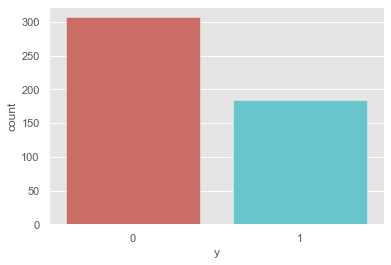

In [32]:
sns.countplot(x='y',data=df, palette='hls')
plt.show()

In [33]:
## I want Y to be +10 Earnings: "Yes, it increased in value based off of X"

In [34]:
## Train and test seperate 

Text(0, 0.5, 'Frequency of Drift')

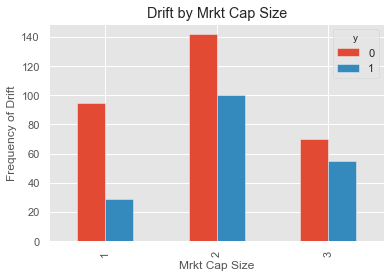

In [35]:
%matplotlib inline
pd.crosstab(df.MRKTVCAT,df.y).plot(kind='bar')
plt.title('Drift by Mrkt Cap Size')
plt.xlabel('Mrkt Cap Size')
plt.ylabel('Frequency of Drift')

Text(0, 0.5, 'Frequency of Drift')

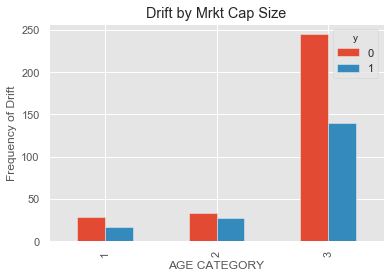

In [36]:
%matplotlib inline
pd.crosstab(df.AGECAT,df.y).plot(kind='bar')
plt.title('Drift by Mrkt Cap Size')
plt.xlabel('AGE CATEGORY')
plt.ylabel('Frequency of Drift')

Text(0, 0.5, 'Frequency of Drift')

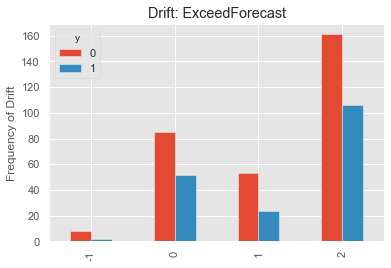

In [37]:
%matplotlib inline
pd.crosstab(df.ExceedForecast,df.y).plot(kind='bar')
plt.title('Drift: ExceedForecast')
plt.xlabel('')
plt.ylabel('Frequency of Drift')

In [38]:
##SHOULD WE CONCATENATE TO CREATE A SUPER VARIABLE? 


In [39]:
df


,Name,Date Public,MarketValue,PQ1Variance,+10 Since Earnings,+20 Since Earnings,+30 Since Earnings,Age,AGECAT,MRKTVCAT,ExceedForecast,y,+20Gain/Loss,+30Gain/Loss
0,Apple Inc.,11/05/1984,1216252.0,0.10,-0.0242,-0.0458,0.0736,35.0,3,3,2,0,0,1
1,Microsoft Corporation,3/13/1986,1208069.0,0.15,0.0346,0.0029,0.0713,34.0,3,3,2,1,1,1
2,"Amazon.com, Inc.",5/15/1997,888591.6,0.60,0.0135,-0.0003,-0.0865,22.0,3,3,2,1,0,0
3,Alphabet Inc. Class A,8/19/2004,836412.7,0.23,0.0268,-0.0186,-0.1211,15.0,2,3,2,1,0,0
4,"Facebook, Inc. Class A",5/18/2012,485374.8,0.01,-0.0114,0.0241,-0.0244,7.0,1,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Macy's Inc,2/05/1992,2481.3,0.08,-0.2136,-0.2242,0.0000,28.0,3,1,2,0,0,0
496,Norwegian Cruise Line Holdings Ltd.,1/18/2013,2366.6,0.04,-0.3083,-0.6118,0.0000,7.0,1,1,2,0,0,0
497,Alliance Data Systems Corporation,6/08/2001,2358.0,-0.01,-0.0631,-0.0491,-0.3326,18.0,2,1,0,0,0,0
498,Capri Holdings Limited,12/15/2011,2080.7,0.04,-0.1459,-0.0882,-0.4037,8.0,1,1,2,0,0,0


In [40]:
df = df[['AGECAT','Name','MRKTVCAT','ExceedForecast','y']]

In [41]:
cols=['AGECAT', 'MRKTVCAT', 'ExceedForecast'] 
X=df[cols]
y=df['y']

In [42]:
X

,AGECAT,MRKTVCAT,ExceedForecast
0,3,3,2
1,3,3,2
2,3,3,2
3,2,3,2
4,1,3,1
...,...,...,...
495,3,1,2
496,1,1,2
497,2,1,0
498,1,1,2


In [43]:
y

0      0
1      1
2      1
3      1
4      0
      ..
495    0
496    0
497    0
498    0
499    1
Name: y, Length: 491, dtype: int64

In [44]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.654791
         Iterations 4
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.010   
Dependent Variable: y                AIC:              649.0048
Date:               2020-04-15 13:51 BIC:              661.5941
No. Observations:   491              Log-Likelihood:   -321.50 
Df Model:           2                LL-Null:          -324.76 
Df Residuals:       488              LLR p-value:      0.038341
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     4.0000                                     
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
AGECAT          -0.3978   0.0933 -4.2614 0.0000 -0.5808 -0.2148
MRKTVCAT         0.2915   0.1173  2.4860 0.0129  0.0617  0.5213
ExceedForecast   0.0077   0

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.61


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.99      0.75       119
           1       0.67      0.03      0.05        78

    accuracy                           0.61       197
   macro avg       0.64      0.51      0.40       197
weighted avg       0.63      0.61      0.48       197



In [48]:
df = df[['AGECAT','MRKTVCAT','ExceedForecast','y']]

In [49]:
X = df.loc[:, df.columns != 'y']
y = df.loc[:, df.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  440
Number of no subscription in oversampled data 220
Number of subscription 220
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [50]:
X_train.shape

(343, 3)

In [51]:
os_data_X.shape

(440, 3)

In [52]:
os_data_y.shape

(440, 1)

In [53]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
logreg2 = LogisticRegression()
logreg2.fit(os_data_X, os_data_y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_pred = logreg2.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.55


In [57]:
# example of training a final classification model
from sklearn.datasets import make_blobs
# generate 2d classification dataset
X, y = make_blobs(n_samples=491, centers=3, n_features=3, random_state=1)
# fit final model
model = LogisticRegression()
model.fit(X, y)
# new instances where we do not know the answer
df, _ = make_blobs(n_samples=491, centers=3, n_features=3, random_state=1)
# make a prediction
y = model.predict(X)
# show the inputs and predicted outputs
for i in range(len(X)):
	print("X=%s, Predicted=%s" % (X[i], y[i]))

X=[-5.61723355 -3.13391986 -1.69772775], Predicted=2
X=[-5.5942472  -3.60469952 -1.40928608], Predicted=2
X=[ -1.23199783   4.48049947 -10.45088111], Predicted=0
X=[-4.31064552 -6.30746323 -7.78231514], Predicted=1
X=[-1.02219809  3.54658326 -8.22510487], Predicted=0
X=[-6.63421657 -3.51853544 -2.34177718], Predicted=2
X=[ -2.50961228   5.36730987 -10.21513068], Predicted=0
X=[ -1.96473311   6.23226365 -10.35990636], Predicted=0
X=[-5.60986813 -2.84282416 -0.58095642], Predicted=2
X=[-6.3416856  -4.42666002 -2.98568549], Predicted=2
X=[-2.36759147 -7.23229692 -8.21766816], Predicted=1
X=[ -2.95112261   3.55824595 -10.16431208], Predicted=0
X=[-3.02676589 -7.26960816 -7.76244149], Predicted=1
X=[-7.06936026 -4.27892352 -3.40618298], Predicted=2
X=[-7.57150312 -2.57311282 -2.84599499], Predicted=2
X=[-7.87648157 -2.12353435 -1.82287408], Predicted=2
X=[-6.70787973 -3.42356897 -1.44740749], Predicted=2
X=[-4.06640332 -6.9135735  -5.63354539], Predicted=1
X=[ -1.50104502   5.2799081  -10.1

In [58]:

# generate 2d classification dataset
X, y = make_blobs(n_samples=491, centers=3, n_features=3, random_state=1)
# fit final model
model = LogisticRegression()
model.fit(X, y)
# new instances where we do not know the answer
X, _ = make_blobs(n_samples=491, centers=3, n_features=3, random_state=1)
# make a prediction
y = model.predict_proba(X)
# show the inputs and predicted probabilities
for i in range(len(X)):
	print("X=%s, Predicted=%s" % (X[i], y[i]))

X=[-5.61723355 -3.13391986 -1.69772775], Predicted=[9.48884658e-05 2.73419126e-04 9.99631692e-01]
X=[-5.5942472  -3.60469952 -1.40928608], Predicted=[5.22518324e-05 3.08853089e-04 9.99638895e-01]
X=[ -1.23199783   4.48049947 -10.45088111], Predicted=[9.99897751e-01 6.55413868e-05 3.67075448e-05]
X=[-4.31064552 -6.30746323 -7.78231514], Predicted=[3.17083173e-04 9.98714568e-01 9.68348603e-04]
X=[-1.02219809  3.54658326 -8.22510487], Predicted=[9.98793038e-01 1.71976828e-04 1.03498558e-03]
X=[-6.63421657 -3.51853544 -2.34177718], Predicted=[8.03963462e-05 5.52582320e-04 9.99367021e-01]
X=[ -2.50961228   5.36730987 -10.21513068], Predicted=[9.99882422e-01 1.43697414e-05 1.03208109e-04]
X=[ -1.96473311   6.23226365 -10.35990636], Predicted=[9.99961274e-01 3.37428503e-06 3.53513762e-05]
X=[-5.60986813 -2.84282416 -0.58095642], Predicted=[2.30950689e-05 2.99049750e-05 9.99947000e-01]
X=[-6.3416856  -4.42666002 -2.98568549], Predicted=[1.66576074e-04 6.29760203e-03 9.93535822e-01]
X=[-2.36759